# Tree Types Prediction

👉 Dataset contains tree observations from four areas of one national forest district. This dataset includes information on

tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a

model that predicts what types of trees grow in an area.

***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the

Kaggle. [external link text](https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset).


## 1. Exploratory Data Analysis

**This part is includes;**

- Examine numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
- Detect relationships and correlations between independent variables and target variable.
- Visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables.
- Dropping features may not contribute to the model.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from plotly import tools
from sklearn import preprocessing
from plotly.subplots import make_subplots
from sklearn.ensemble import RandomForestClassifier
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [67]:
data = pd.read_csv("covtype.csv")
df = data.copy()

In [68]:
df.shape

(227132, 55)

In [69]:
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Elevation,2596.0,2590.0,2804.0,2785.0,2595.0,2579.0,2606.0,2605.0,2617.0,2612.0,2612.0,2886.0,2742.0,2609.0,2503.0
Aspect,51.0,56.0,139.0,155.0,45.0,132.0,45.0,49.0,45.0,59.0,201.0,151.0,134.0,214.0,157.0
Slope,3.0,2.0,9.0,18.0,2.0,6.0,7.0,4.0,9.0,10.0,4.0,11.0,22.0,7.0,4.0
Horizontal_Distance_To_Hydrology,258.0,212.0,268.0,242.0,153.0,300.0,270.0,234.0,240.0,247.0,180.0,371.0,150.0,150.0,67.0
Vertical_Distance_To_Hydrology,0.0,-6.0,65.0,118.0,-1.0,-15.0,5.0,7.0,56.0,11.0,51.0,26.0,69.0,46.0,4.0
Horizontal_Distance_To_Roadways,510.0,390.0,3180.0,3090.0,391.0,67.0,633.0,573.0,666.0,636.0,735.0,5253.0,3215.0,771.0,674.0
Hillshade_9am,221.0,220.0,234.0,238.0,220.0,230.0,222.0,222.0,223.0,228.0,218.0,234.0,248.0,213.0,224.0
Hillshade_Noon,232.0,235.0,238.0,238.0,234.0,237.0,225.0,230.0,221.0,219.0,243.0,240.0,224.0,247.0,240.0
Hillshade_3pm,148.0,151.0,135.0,122.0,150.0,140.0,138.0,144.0,133.0,124.0,161.0,136.0,92.0,170.0,151.0
Horizontal_Distance_To_Fire_Points,6279.0,6225.0,6121.0,6211.0,6172.0,6031.0,6256.0,6228.0,6244.0,6230.0,6222.0,4051.0,6091.0,6211.0,5600.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227132 entries, 0 to 227131
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           227132 non-null  int64  
 1   Aspect                              227132 non-null  int64  
 2   Slope                               227132 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    227132 non-null  int64  
 4   Vertical_Distance_To_Hydrology      227132 non-null  int64  
 5   Horizontal_Distance_To_Roadways     227132 non-null  int64  
 6   Hillshade_9am                       227132 non-null  int64  
 7   Hillshade_Noon                      227131 non-null  float64
 8   Hillshade_3pm                       227131 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  227131 non-null  float64
 10  Wilderness_Area1                    227131 non-null  float64
 11  Wilderness_Area2          

In [71]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type'], dtype='object')

In [72]:
df.Cover_Type.value_counts(dropna = False)

2.0    143736
1.0     68231
5.0      4499
7.0      3143
3.0      2871
6.0      2491
4.0      2160
NaN         1
Name: Cover_Type, dtype: int64

In [73]:
for col in df.columns:
    print(f"{col:50} sütununda {df[col].nunique()}  tane unique value var.")

Elevation                                          sütununda 1670  tane unique value var.
Aspect                                             sütununda 361  tane unique value var.
Slope                                              sütununda 65  tane unique value var.
Horizontal_Distance_To_Hydrology                   sütununda 435  tane unique value var.
Vertical_Distance_To_Hydrology                     sütununda 591  tane unique value var.
Horizontal_Distance_To_Roadways                    sütununda 5785  tane unique value var.
Hillshade_9am                                      sütununda 193  tane unique value var.
Hillshade_Noon                                     sütununda 176  tane unique value var.
Hillshade_3pm                                      sütununda 249  tane unique value var.
Horizontal_Distance_To_Fire_Points                 sütununda 5827  tane unique value var.
Wilderness_Area1                                   sütununda 2  tane unique value var.
Wilderness_Area2     

In [74]:
numeric = []

for col in df.columns:
    if df[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


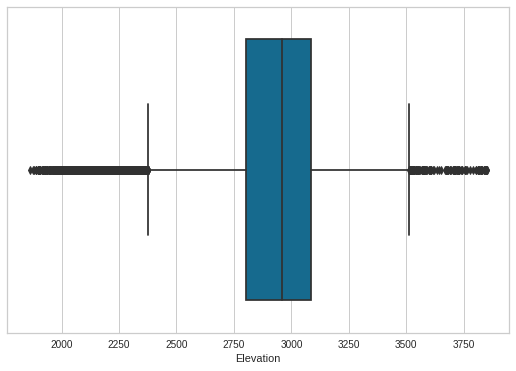

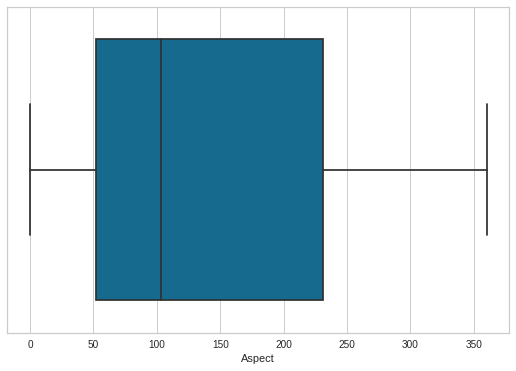

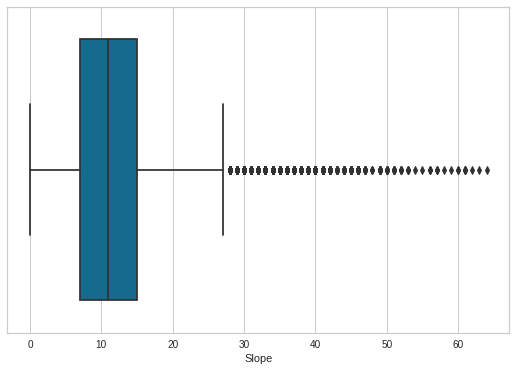

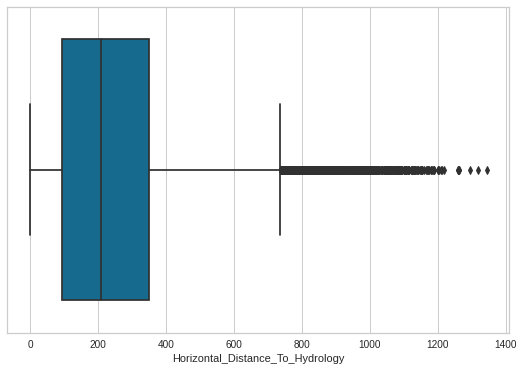

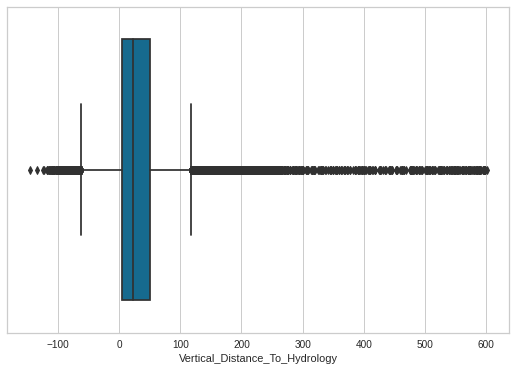

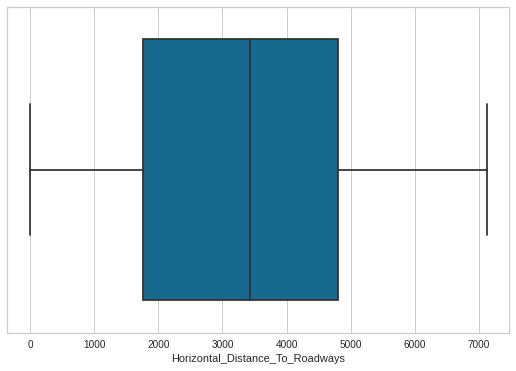

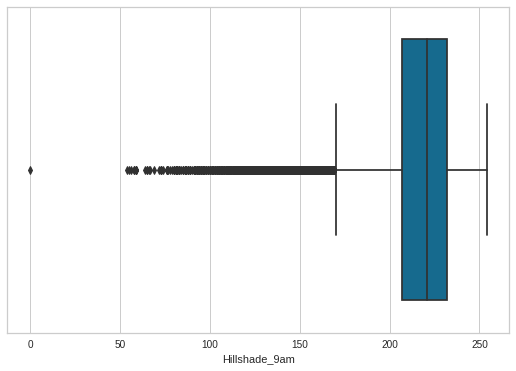

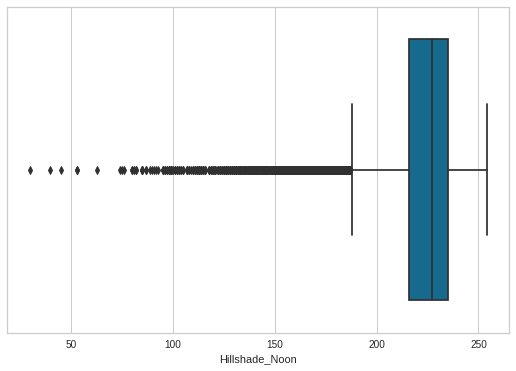

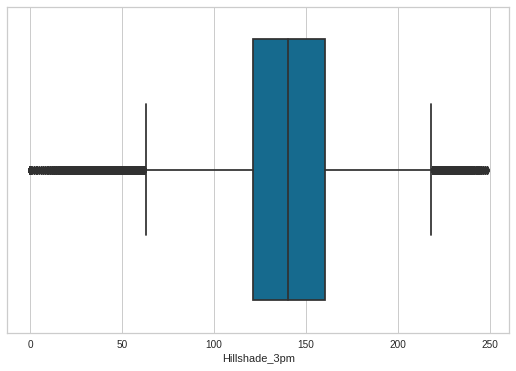

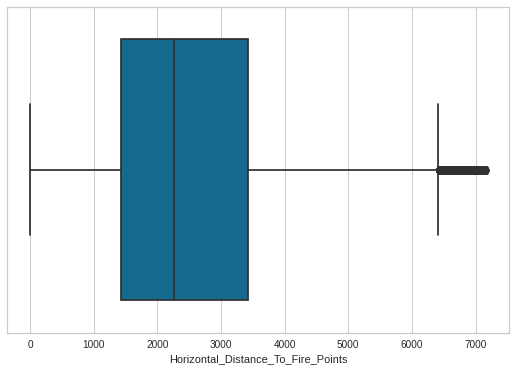

In [75]:
for i in numeric:
    plt.figure(figsize=(9,6))
    sns.boxplot(df[(i)]);

In [76]:
df[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,227132.0,2936.174366,220.866442,1863.0,2802.0,2959.0,3086.0,3849.0
Aspect,227132.0,140.250986,109.877092,0.0,52.0,103.0,231.0,360.0
Slope,227132.0,11.736567,6.581980,0.0,7.0,11.0,15.0,64.0
Horizontal_Distance_To_Hydrology,227132.0,243.559529,185.538377,0.0,95.0,210.0,351.0,1343.0
Vertical_Distance_To_Hydrology,227132.0,34.337597,44.012278,-146.0,5.0,22.0,50.0,601.0
Horizontal_Distance_To_Roadways,227132.0,3325.142393,1732.458322,0.0,1766.0,3429.0,4795.0,7117.0
Hillshade_9am,227132.0,216.702266,21.635713,0.0,207.0,221.0,232.0,254.0
Hillshade_Noon,227131.0,224.239087,16.884463,30.0,216.0,227.0,235.0,254.0
Hillshade_3pm,227131.0,140.010368,32.600456,0.0,121.0,140.0,160.0,248.0
Horizontal_Distance_To_Fire_Points,227131.0,2596.559950,1605.014182,0.0,1423.0,2259.0,3417.0,7173.0


## 2.  Data Cleaning

### Detect Missing Values and Outliers

In [77]:
df.isnull().sum().any()

True

In [78]:
df.isnull().sum()*100/df.shape[0]

Elevation                             0.00000
Aspect                                0.00000
Slope                                 0.00000
Horizontal_Distance_To_Hydrology      0.00000
Vertical_Distance_To_Hydrology        0.00000
Horizontal_Distance_To_Roadways       0.00000
Hillshade_9am                         0.00000
Hillshade_Noon                        0.00044
Hillshade_3pm                         0.00044
Horizontal_Distance_To_Fire_Points    0.00044
Wilderness_Area1                      0.00044
Wilderness_Area2                      0.00044
Wilderness_Area3                      0.00044
Wilderness_Area4                      0.00044
Soil_Type1                            0.00044
Soil_Type2                            0.00044
Soil_Type3                            0.00044
Soil_Type4                            0.00044
Soil_Type5                            0.00044
Soil_Type6                            0.00044
Soil_Type7                            0.00044
Soil_Type8                        

In [79]:
df.dropna(axis=0,inplace=True)

In [80]:
df.columns.value_counts(normalize=True)

Elevation                             0.018182
Soil_Type28                           0.018182
Soil_Type17                           0.018182
Soil_Type18                           0.018182
Soil_Type19                           0.018182
Soil_Type20                           0.018182
Soil_Type21                           0.018182
Soil_Type22                           0.018182
Soil_Type23                           0.018182
Soil_Type24                           0.018182
Soil_Type25                           0.018182
Soil_Type26                           0.018182
Soil_Type27                           0.018182
Soil_Type29                           0.018182
Soil_Type15                           0.018182
Soil_Type30                           0.018182
Soil_Type31                           0.018182
Soil_Type32                           0.018182
Soil_Type33                           0.018182
Soil_Type34                           0.018182
Soil_Type35                           0.018182
Soil_Type36  

### Deal with Outliers

There are many different methods for outliers. You can use IQR values used as standard to deal with outliers, or you can define two functions to help you understand the outliers and how you can deal with them.

In [81]:
from scipy.stats import stats

In [82]:
def detect_outliers(df, col_name):
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count


In [83]:
df = df[(df['Slope'] > detect_outliers(df, 'Slope')[0]) &
              (df['Slope'] < detect_outliers(df, 'Slope')[1])]
df.shape

(226739, 55)

In [84]:
df = df[(df['Horizontal_Distance_To_Hydrology'] > detect_outliers(df, 'Horizontal_Distance_To_Hydrology')[0]) &
              (df['Horizontal_Distance_To_Hydrology'] < detect_outliers(df, 'Horizontal_Distance_To_Hydrology')[1])]
df.shape

(226686, 55)

In [85]:
df = df[(df['Vertical_Distance_To_Hydrology'] > detect_outliers(df, 'Vertical_Distance_To_Hydrology')[0]) &
              (df['Vertical_Distance_To_Hydrology'] < detect_outliers(df, 'Vertical_Distance_To_Hydrology')[1])]
df.shape

(224494, 55)

In [86]:
df = df[(df['Hillshade_9am'] > detect_outliers(df, 'Hillshade_9am')[0]) &
              (df['Hillshade_9am'] < detect_outliers(df, 'Hillshade_9am')[1])]
df.shape

(223867, 55)

In [87]:
df = df[(df['Hillshade_Noon'] > detect_outliers(df, 'Hillshade_Noon')[0]) &
              (df['Hillshade_Noon'] < detect_outliers(df, 'Hillshade_Noon')[1])]
df.shape

(223088, 55)

In [88]:
df = df[(df['Horizontal_Distance_To_Fire_Points'] > detect_outliers(df, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (df['Horizontal_Distance_To_Fire_Points'] < detect_outliers(df, 'Horizontal_Distance_To_Fire_Points')[1])]
df.shape

(223088, 55)

In [89]:
for col in numeric:
    if detect_outliers(df, col)[2] > 0:
        print("There are {} outliers in {}".format(detect_outliers(df, col)[2], col))

There are 44 outliers in Elevation
There are 241 outliers in Vertical_Distance_To_Hydrology
There are 160 outliers in Hillshade_3pm



- ****Our data is already ready to be inserted into models, non-null values ​​and get dummy data.****

In [90]:
liste = []
for i in df.columns:
    if 'Distance' in i:
        liste.append(i)
liste

['Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points']

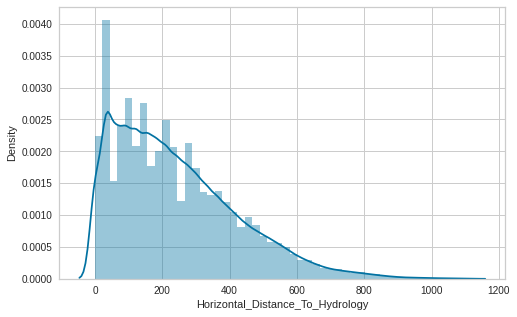

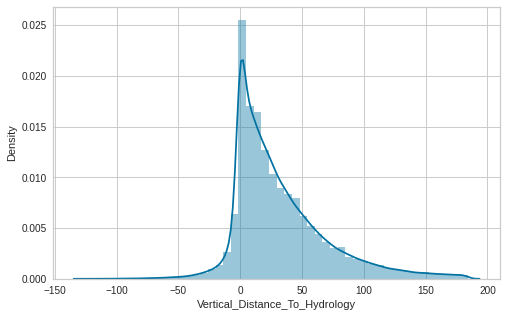

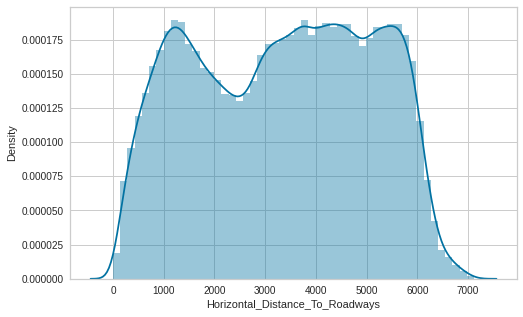

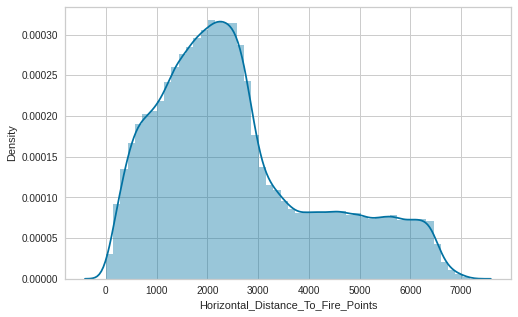

In [91]:
for i in liste:
    plt.figure(figsize=(8,5))
    sns.distplot(df[i],bins = 50);

## 4. Prediction (Multi-class Classification)

### Data Preprocessing

In [92]:
X = df.drop("Cover_Type", axis = 1)
y = df["Cover_Type"]

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [95]:
from xgboost import XGBClassifier

In [96]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

In [97]:
y_pred = xgb.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [99]:
xgb_f1 = f1_score(y_test, y_pred, average='micro')
xgb_recall = recall_score(y_test, y_pred, average='micro')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[13188  6980     1     0     1     3    61]
 [ 3462 38868    25     0    87    76    12]
 [    0    60   486    66     1   138     0]
 [    0     0    28   577     0     9     0]
 [    7   786    16     0   456    25     0]
 [    0    98   137    38     0   427     0]
 [  327     3     0     0     0     0   478]]
              precision    recall  f1-score   support

         1.0       0.78      0.65      0.71     20234
         2.0       0.83      0.91      0.87     42530
         3.0       0.70      0.65      0.67       751
         4.0       0.85      0.94      0.89       614
         5.0       0.84      0.35      0.50      1290
         6.0       0.63      0.61      0.62       700
         7.0       0.87      0.59      0.70       808

    accuracy                           0.81     66927
   macro avg       0.78      0.67      0.71     66927
weighted avg       0.81      0.81      0.81     66927



In [100]:
y_train_pred = xgb.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


[[31011 16157     3     0    21     7   163]
 [ 8100 90558    57     0   197   162    25]
 [    0   157  1141   122     6   261     0]
 [    0     0    55  1394     0    10     0]
 [   16  1809    43     0   974    57     0]
 [    0   235   315    77     1   968     0]
 [  853     9     0     0     0     0  1197]]
              precision    recall  f1-score   support

         1.0       0.78      0.65      0.71     47362
         2.0       0.83      0.91      0.87     99099
         3.0       0.71      0.68      0.69      1687
         4.0       0.88      0.96      0.91      1459
         5.0       0.81      0.34      0.48      2899
         6.0       0.66      0.61      0.63      1596
         7.0       0.86      0.58      0.70      2059

    accuracy                           0.81    156161
   macro avg       0.79      0.67      0.71    156161
weighted avg       0.81      0.81      0.81    156161



In [101]:
xgb.feature_importances_

array([0.09817767, 0.01214987, 0.00726408, 0.03021462, 0.02846519,
       0.03403869, 0.01220973, 0.02957982, 0.01916386, 0.02786769,
       0.06563152, 0.00166692, 0.03404171, 0.08553486, 0.00124902,
       0.01578332, 0.01990242, 0.03017723, 0.01507375, 0.00107518,
       0.        , 0.        , 0.01434971, 0.03298418, 0.01497783,
       0.03993499, 0.00152923, 0.        , 0.        , 0.01993777,
       0.0087998 , 0.0128195 , 0.        , 0.01027747, 0.        ,
       0.03328864, 0.0482086 , 0.02024817, 0.        , 0.        ,
       0.        , 0.        , 0.10731512, 0.02760935, 0.00437344,
       0.00402111, 0.0086855 , 0.        , 0.        , 0.        ,
       0.        , 0.01090847, 0.00620599, 0.00425807], dtype=float32)

In [102]:
feats = pd.DataFrame(index=X.columns,data=xgb.feature_importances_,columns=['Importance'])
feats

,Importance
Elevation,0.098178
Aspect,0.012150
Slope,0.007264
Horizontal_Distance_To_Hydrology,0.030215
Vertical_Distance_To_Hydrology,0.028465
Horizontal_Distance_To_Roadways,0.034039
Hillshade_9am,0.012210
Hillshade_Noon,0.029580
Hillshade_3pm,0.019164
Horizontal_Distance_To_Fire_Points,0.027868


In [103]:
imp_feats = feats.sort_values("Importance")

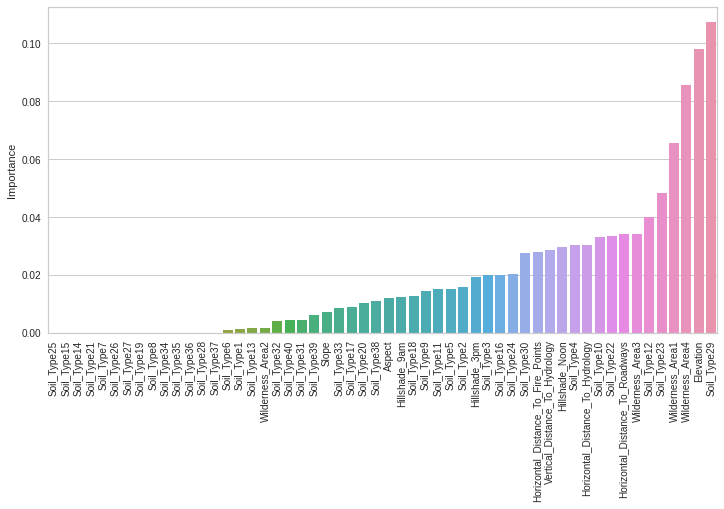

In [104]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

In [ ]:
#!pip install pycaret

In [106]:
from pycaret.classification import *
exp_name=setup(data=df,target='Cover_Type')

,Description,Value
0,session_id,2332
1,Target,Cover_Type
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(223088, 55)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,43
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Cover_Type', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best_model=compare_models()  # because the data volume is high,the cell worked too long.I interrupted the kernel at this level and take screenshot.

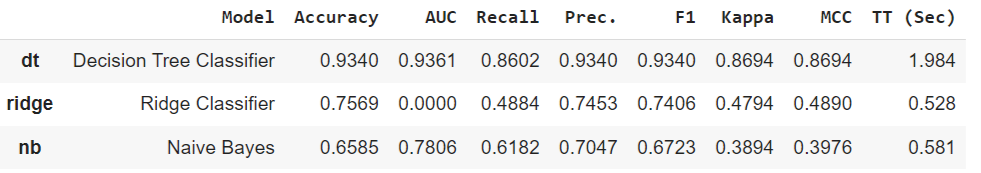

* **The best accuracy score is Decision Tree Classifier.This model can predict the tree cover types with %93 percent.**